In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

data = iris.data
feature_names = iris.feature_names
y = iris.target

df = pd.DataFrame(data, columns = feature_names)
df["class"] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
#%% PCA Analysis

from sklearn.decomposition import PCA
pca = PCA(n_components = 2,whiten=True)
pca.fit(df)

x_pca = pca.transform(df)

print("variance ratio: ", pca.explained_variance_ratio_)
print("sum: ",sum(pca.explained_variance_ratio_))

variance ratio:  [0.92264373 0.04812763]
sum:  0.970771364211738


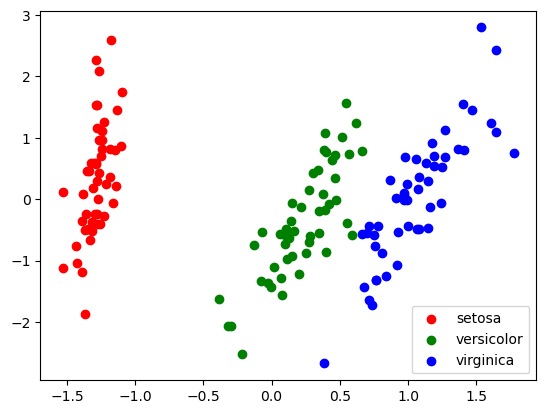

In [12]:
df["p1"] = x_pca[:,0]
df["p2"] = x_pca[:,1]

color = ["red","green","blue"]

for each in range(3):
    plt.scatter(df.p1[df["class"] == each],df.p2[df["class"]==each],color=color[each],label = iris.target_names[each])

plt.legend()

# Feature Selection ???

In [13]:
from sklearn.feature_selection import VarianceThreshold
X = [[0,0,1],[0,1,0],[1,0,0],[0,1,1],[0,1,0],[0,1,1]]

In [15]:
sel = VarianceThreshold(threshold = (0.8 *(1- 0.8))) # var(x) = p(1-p)
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

In [16]:
# statistical model selection
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel
X, y = load_iris(return_X_y= True)
X.shape

(150, 4)

In [18]:
X_new = SelectKBest(chi2,k=2).fit_transform(X,y)
X_new.shape

(150, 2)

In [ ]:
# model based feature selection
from sklearn.svm import LinearSVC
